In [78]:
#Import required packages 

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


In [79]:
#load dataset

In [80]:
a_dataset = pd.read_csv("train_data.csv")
test_dataset = pd.read_csv("test_data.csv")

In [81]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[ 24, 33], [55, 56]])

np.concatenate([arr, arr2], axis = 1)



array([[ 1,  2,  3, 24, 33],
       [ 4,  5,  6, 55, 56]])

In [82]:
#Print dataset information

In [83]:
a_dataset['TypeOfAdmission'].unique()

array(['Newborn', 'Emergency', 'Elective', 'Urgent'], dtype=object)

# EDA
## Excluding columns
Look at the data below and the provided text file outlining the data value for each column
The first two columns ID, HealthServiceArea provide no real use in our dataframe. 
## Onehot encoding 
Looking at the various columns, there are various categorical values such as Gender, Race, TypeOfAdmission, CCSProcedureCode,APRSeverityOfIllnessCode, PaymentTypology and EmergencyDepartmentIndicator.

Looking at these columns further  all are able to one hot encoded except APRSeverityOfIllness Code as these can be considered ordinal from 1 (Minor) to 4 (Extreme)
## Logistic Regression
As we are trying to predict two outcomes ie. binary, either 0 or 1 logistic regression is the most appropriate approach for this model. Linear regression does not make sense as that approach is more so for predicting continuous outcomes.  
## Decision Trees
For this assignment, Decision trees are also a viable option, however it is very difficult to choose from Logistic Regression and Decision Trees. In order to fully decide on which approach to use as to clearly see which approach is superior, one must try both models then attempt to cross-validate. So for this assignment the main approach will be Logistic Regression

In [84]:
print(a_dataset)

          ID HealthServiceArea Gender                    Race TypeOfAdmission  \
0          1     New York City      F              Other Race         Newborn   
1          2     New York City      M  Black/African American         Newborn   
2          3     New York City      M              Other Race         Newborn   
3          4     New York City      F              Other Race         Newborn   
4          5     New York City      F              Other Race         Newborn   
...      ...               ...    ...                     ...             ...   
59961  59962        Western NY      M  Black/African American         Newborn   
59962  59963        Western NY      M                   White         Newborn   
59963  59964        Western NY      M                   White         Newborn   
59964  59965        Western NY      M                   White         Newborn   
59965  59966        Western NY      F                   White         Newborn   

       CCSProcedureCode  AP

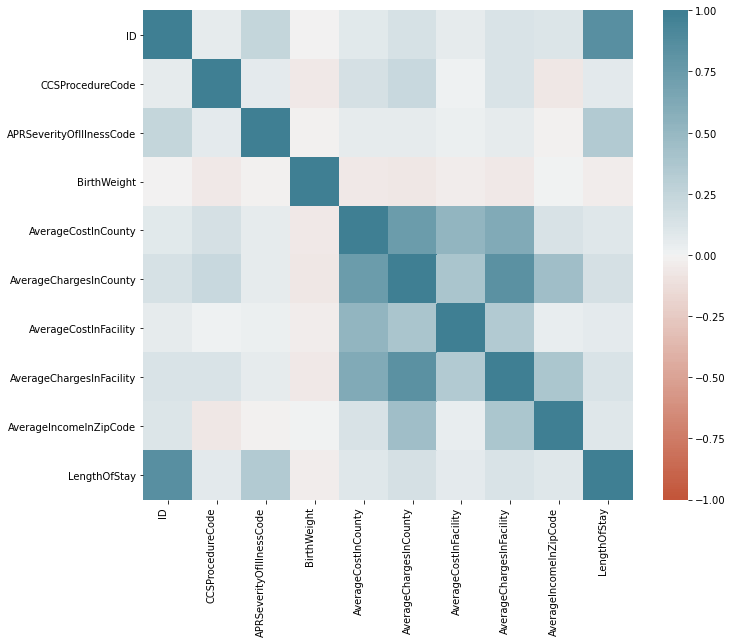

In [85]:
f, ax = plt.subplots(figsize=(11, 9))
corr = a_dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

#### Looking at the correlation matrix above we can already somewhat predict that APRSSeverity illness code has correlation  with Length of stay (around 0.30-0.40)
#### This could be the most influential value when it comes to the predicted outcome from our model detecting if LengthofStay is 0 or 1 
#### As expected Columns AverageCostInCounty, AverageChargeInCounty, AverageChargesInFacility, AverageIncomeInZipCode all have correlation with one another

 Remove ID 

In [86]:
a_dataset = a_dataset.drop(columns = ['ID'])
test_dataset = test_dataset.drop(columns = ['ID'])

In [87]:
a_dataset = a_dataset.drop(columns = ['HealthServiceArea'])
test_dataset = test_dataset.drop(columns = ['HealthServiceArea'])

In [88]:
# One-hot encoding, specifically Gender(M, F, U), Race(Black/African American, Multi, Other Race, Unkown, White, Other Race),  TypeOfAdmission(Elective, Emergency, Newborn, Not Available, Trauma, Urgent)
# APRSeverityOfIllnessCode(Minor (1), Moderate (2),   Major (3), Extreme (4)), 
#PaymentTypology('Medicaid', 'Blue Cross/Blue Shield', 'Private Health Insurance', 'Medicare', 'Managed Care, Unspecified', 'Self-Pay', 'Unknown', 'Federal/State/Local/VA', 'Miscellaneous/Other','Department of Corrections')
#EmergencyDepartmentIndicator(Y, N) 

#### We will now Onehot encode all the non-ordinal categorical data 

##### Looking at the provided read me there are 6 Columns with categorical data with more that 2 values 
##### Examing further, we can narrow down that 5 of these Columns are considered "nominal", these are 'Gender', 'Race', 'TypeOfAdmission', 'CCSProcedureCode', 'PaymentTypology'
##### We will not OneHotEncode 'APRSeverityOfIllnessCode' as this can be considered Ordinal ie. 1 is considered Minor to 4 which is considered extreme 


In [89]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
OneHotEncoder_Gender = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_Gender.fit(a_dataset[['Gender']])

test_OneHotEncoder_Gender = OneHotEncoder(handle_unknown ='ignore')
test_OneHotEncoder_Gender.fit(test_dataset[['Gender']])

onehot_ = OneHotEncoder_Gender.transform(a_dataset[['Gender']]).toarray()
test_onehot_ = test_OneHotEncoder_Gender.transform(test_dataset[['Gender']]).toarray()
print(test_onehot_)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [91]:
print(onehot_.shape, OneHotEncoder_Gender.categories_)

(59966, 3) [array(['F', 'M', 'U'], dtype=object)]


In [92]:
# Begin One hot encoding for 'Gender'

In [93]:
colname = 'Gender'
for i in range(len(OneHotEncoder_Gender.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_Gender.categories_[0][i])] = onehot_[:,i]
    
for i in range(len(test_OneHotEncoder_Gender.categories_[0])):
    test_dataset[colname + '_' + str(test_OneHotEncoder_Gender.categories_[0][i])] = test_onehot_[:,i]

In [94]:

a_dataset.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,1.0,0.0,0.0
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,0.0,1.0,0.0
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,1.0,0.0
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,1.0,0.0,0.0
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,1.0,0.0,0.0


In [95]:
a_dataset = a_dataset.drop(columns = ['Gender'])
test_dataset = test_dataset.drop(columns = ['Gender'])

In [96]:
a_dataset['TypeOfAdmission'].unique()

array(['Newborn', 'Emergency', 'Elective', 'Urgent'], dtype=object)

In [97]:
## Do every other categorical column

In [98]:
OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_TypeOfAdmission.fit(a_dataset[['TypeOfAdmission']])

test_OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown ='ignore')
test_OneHotEncoder_TypeOfAdmission.fit(test_dataset[['TypeOfAdmission']])

onehot_ = OneHotEncoder_TypeOfAdmission.transform(a_dataset[['TypeOfAdmission']]).toarray()
test_onehot_  = test_OneHotEncoder_TypeOfAdmission.transform(test_dataset[['TypeOfAdmission']]).toarray()

colname = 'TypeOfAdmission'

for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_[:,i]
    
for i in range(len(test_OneHotEncoder_TypeOfAdmission.categories_[0])):
    test_dataset[colname + '_' + str(test_OneHotEncoder_TypeOfAdmission.categories_[0][i])] = test_onehot_[:,i]
    

In [99]:
print(test_OneHotEncoder_TypeOfAdmission.categories_, OneHotEncoder_TypeOfAdmission.categories_)


[array(['Elective', 'Emergency', 'Newborn', 'Trauma', 'Urgent'],
      dtype=object)] [array(['Elective', 'Emergency', 'Newborn', 'Urgent'], dtype=object)]


In [100]:
a_dataset = a_dataset.drop(columns = ['TypeOfAdmission'])
test_dataset = test_dataset.drop(columns = ['TypeOfAdmission'])

In [101]:
OneHotEncoder_Race = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_Race.fit(a_dataset[['Race']])

test_OneHotEncoder_Race = OneHotEncoder(handle_unknown ='ignore')
test_OneHotEncoder_Race.fit(test_dataset[['Race']])

onehot_ = OneHotEncoder_Race.transform(a_dataset[['Race']]).toarray()
test_onehot_ = test_OneHotEncoder_Race.transform(test_dataset[['Race']]).toarray()

colname = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_[:,i]

for i in range(len(test_OneHotEncoder_Race.categories_[0])):
    test_dataset[colname + '_' + str(test_OneHotEncoder_Race.categories_[0][i])] = test_onehot_[:,i]


In [102]:
a_dataset = a_dataset.drop(columns = ['Race'])



In [103]:
a_dataset.head()

,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,...,Gender_M,Gender_U,TypeOfAdmission_Elective,TypeOfAdmission_Emergency,TypeOfAdmission_Newborn,TypeOfAdmission_Urgent,Race_Black/African American,Race_Multi-racial,Race_Other Race,Race_White
0,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### We insert TypeOfAdmission_Trauma as this was not fitted due to not appearing in "train_data.csv" even though this is a categorical value stated in the readme

In [104]:
a_dataset.insert(18, "TypeOfAdmission_Trauma", 0.0)


In [105]:
test_dataset = test_dataset.drop(columns = ['Race'])

In [106]:
OneHotEncoder_CCSProcedureCode = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_CCSProcedureCode.fit(a_dataset[['CCSProcedureCode']])

test_OneHotEncoder_CCSProcedureCode = OneHotEncoder(handle_unknown ='ignore')
test_OneHotEncoder_CCSProcedureCode.fit(test_dataset[['CCSProcedureCode']])

onehot_ = OneHotEncoder_CCSProcedureCode.transform(a_dataset[['CCSProcedureCode']]).toarray()
test_onehot_ = test_OneHotEncoder_CCSProcedureCode.transform(test_dataset[['CCSProcedureCode']]).toarray()

colname = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_[:,i]

for i in range(len(test_OneHotEncoder_CCSProcedureCode.categories_[0])):
    test_dataset[colname + '_' + str(test_OneHotEncoder_CCSProcedureCode.categories_[0][i])] = test_onehot_[:,i]

a_dataset = a_dataset.drop(columns = ['CCSProcedureCode'])
test_dataset = test_dataset.drop(columns = ['CCSProcedureCode'])

In [107]:
test_dataset.columns

Index(['APRSeverityOfIllnessCode', 'PaymentTypology', 'BirthWeight',
       'EmergencyDepartmentIndicator', 'AverageCostInCounty',
       'AverageChargesInCounty', 'AverageCostInFacility',
       'AverageChargesInFacility', 'AverageIncomeInZipCode', 'Gender_F',
       'Gender_M', 'Gender_U', 'TypeOfAdmission_Elective',
       'TypeOfAdmission_Emergency', 'TypeOfAdmission_Newborn',
       'TypeOfAdmission_Trauma', 'TypeOfAdmission_Urgent',
       'Race_Black/African American', 'Race_Multi-racial', 'Race_Other Race',
       'Race_White', 'CCSProcedureCode_-1', 'CCSProcedureCode_0',
       'CCSProcedureCode_115', 'CCSProcedureCode_216', 'CCSProcedureCode_220',
       'CCSProcedureCode_228', 'CCSProcedureCode_231'],
      dtype='object')

In [108]:
a_dataset.loc[a_dataset.EmergencyDepartmentIndicator == "N", "EmergencyDepartmentIndicator"] = 0
a_dataset.loc[a_dataset.EmergencyDepartmentIndicator == "Y", "EmergencyDepartmentIndicator"] = 1

test_dataset.loc[test_dataset.EmergencyDepartmentIndicator == "N", "EmergencyDepartmentIndicator"] = 0
test_dataset.loc[test_dataset.EmergencyDepartmentIndicator == "Y", "EmergencyDepartmentIndicator"] = 1


In [109]:
OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_PaymentTypology.fit(a_dataset[['PaymentTypology']])

test_OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown ='ignore')
test_OneHotEncoder_PaymentTypology.fit(test_dataset[['PaymentTypology']])

onehot_ = OneHotEncoder_PaymentTypology.transform(a_dataset[['PaymentTypology']]).toarray()
test_onehot_ = test_OneHotEncoder_PaymentTypology.transform(test_dataset[['PaymentTypology']]).toarray()

colname = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_[:,i]
for i in range(len(test_OneHotEncoder_PaymentTypology.categories_[0])):
    test_dataset[colname + '_' + str(test_OneHotEncoder_PaymentTypology.categories_[0][i])] = test_onehot_[:,i]
    
a_dataset = a_dataset.drop(columns = ['PaymentTypology'])
test_dataset = test_dataset.drop(columns = ['PaymentTypology'])

In [110]:
test_dataset.columns.difference(a_dataset.columns)

Index(['PaymentTypology_Department of Corrections'], dtype='object')

#### The PaymentTypology "Department of Corrections" was not found in the train dataset but it was found in the test data so we will add it with the value 0 

In [111]:
test_dataset.head()

a_dataset.insert(29, "PaymentTypology_Department of Corrections", '0.0')

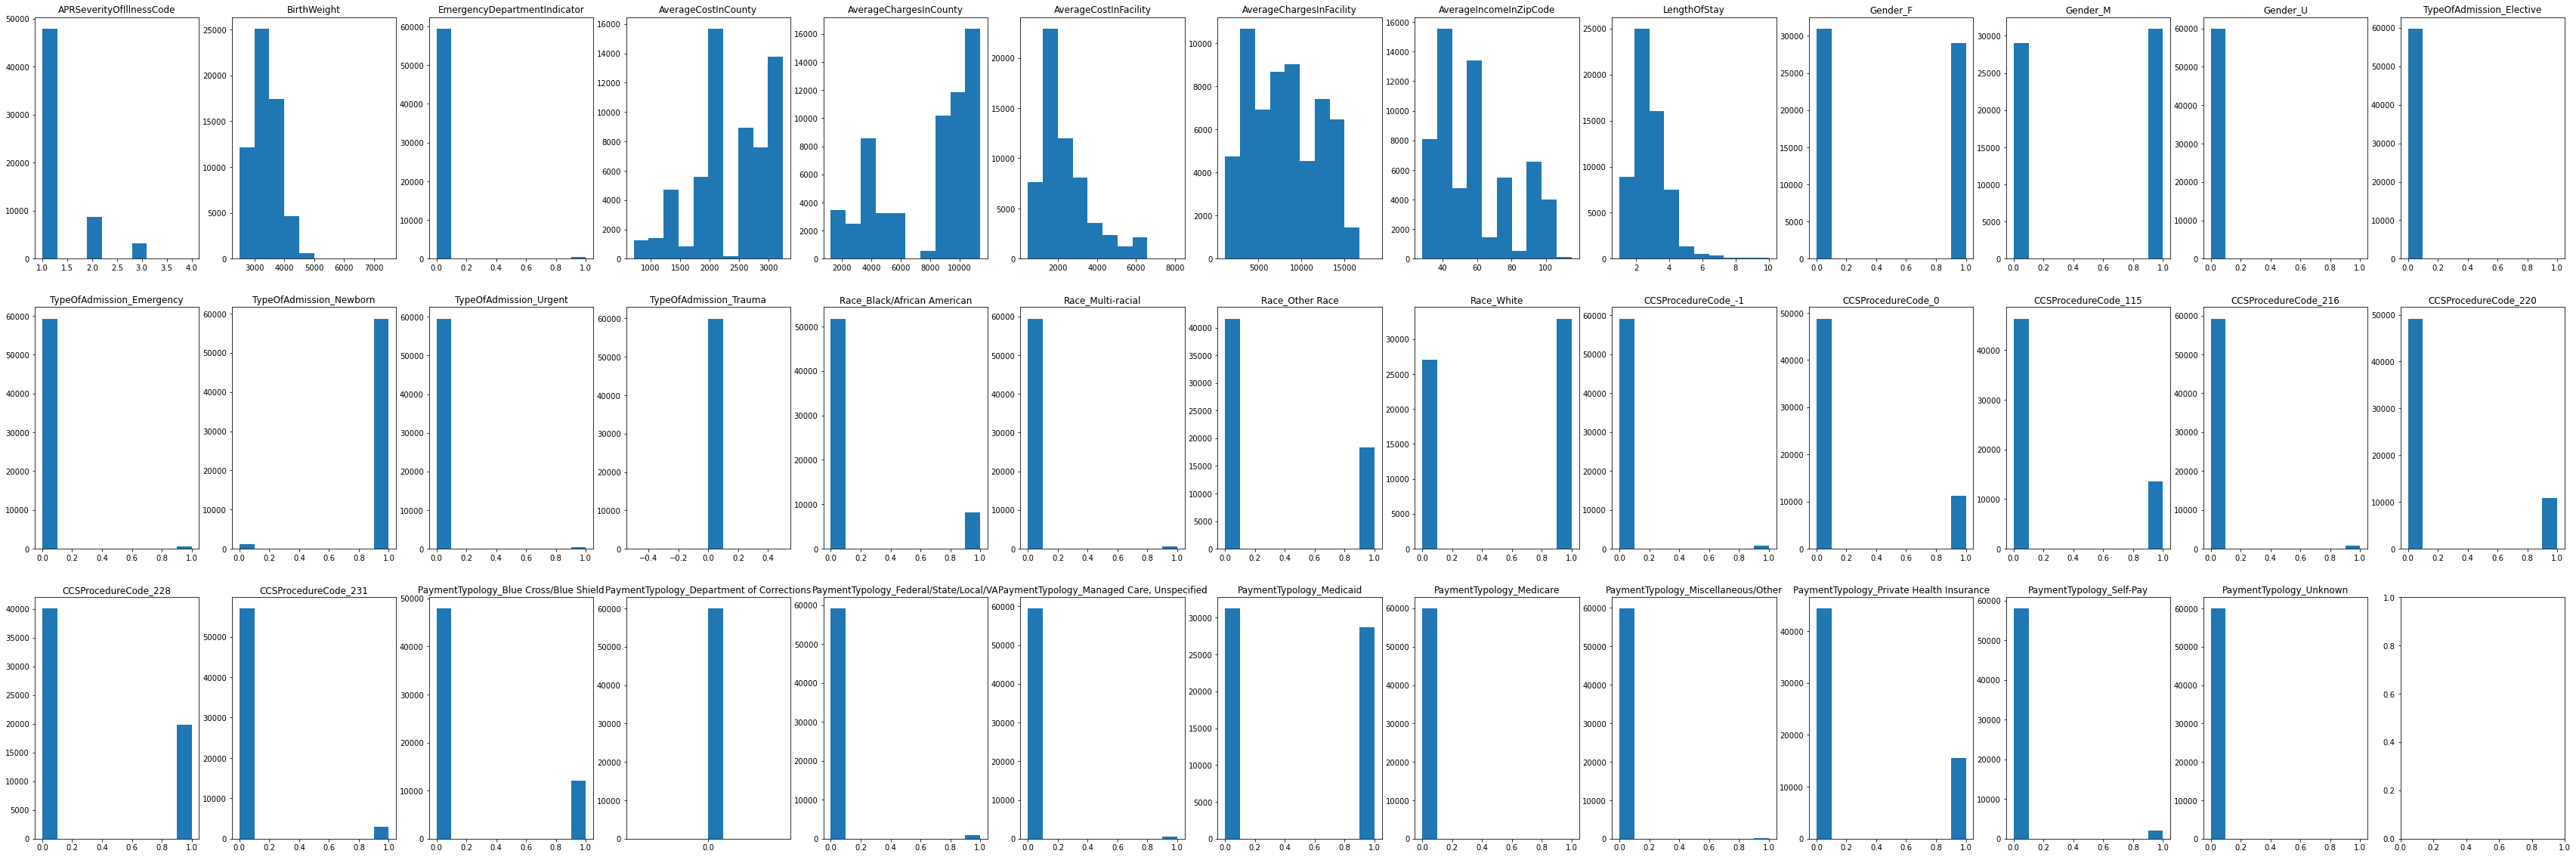

In [112]:
i = 0
j = 0
num_col = len(a_dataset.columns)

fig, axs = plt.subplots(3, 13,figsize=(60,20))
num_bins = 10


for col in a_dataset.columns:
    axs[j][i].hist(a_dataset[col], num_bins)
    axs[j][i].title.set_text(col)
       
    i +=1
    if i == 13:
        
        j += 1
        i = 0
    
plt.show()

<h3>Determine which Scaling technique to use</h3>

Text(0.5, 1.0, 'After Standard Scaling')

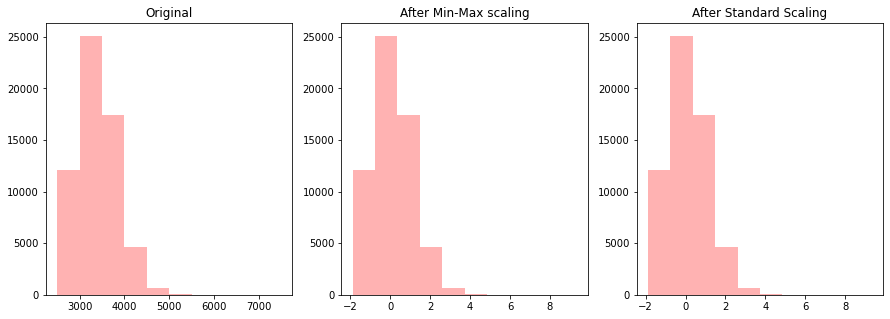

In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

MinMaxScaler = MinMaxScaler().fit(a_dataset[['BirthWeight']])
minmax = MinMaxScaler.transform(a_dataset[['BirthWeight']])

StandardScaler = StandardScaler().fit(a_dataset[['BirthWeight']])
standard = StandardScaler.transform(a_dataset[['BirthWeight']])
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(a_dataset[['BirthWeight']], alpha=0.3, color='r')
plt.title("Original")

plt.subplot(1,3,2)
plt.hist(standard, alpha=0.3, color='r')
plt.title("After Min-Max scaling")

plt.subplot(1,3,3)
plt.hist(standard, alpha=0.3, color='r')
plt.title("After Standard Scaling")



#### We will use Standard Scaling for transformation after applying PolynomialFeatures(2) on our Dataset

In [114]:
"""a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
"""

"a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])\na_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])\na_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])\n"

### Transform column "LengthOfStay" to 0 (if LengthOfStay < 4) or 1 if ( Length of stay >= 4)

In [115]:
a_dataset.loc[a_dataset.LengthOfStay < 4, "LengthOfStay"] = 0
a_dataset.loc[a_dataset.LengthOfStay > 3, "LengthOfStay"] = 1


In [116]:
a_dataset

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Department of Corrections,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
0,1,3700,0,2611,9227,1751,8951,45,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2900,0,3242,8966,3338,6409,34,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,3200,0,3155,11381,4980,9323,45,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3300,0,3155,11381,5826,15680,59,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,2600,0,2611,9227,6000,14344,59,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59961,1,3600,0,1826,4190,1551,3715,36,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59962,2,3300,0,1826,4190,1551,3715,55,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59963,2,3400,0,1826,4190,1551,3715,55,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59964,2,3100,0,1826,4190,1551,3715,55,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Start building Regression model
#### We will start by further splitting training data into training and validation

In [117]:
print(a_dataset.shape[1])

38


In [118]:

from sklearn.model_selection import train_test_split

drop_indices = np.random.choice(a_dataset.index, 20000, replace=False)
a_subset = a_dataset #a_dataset.drop(drop_indices) #a_dataset

with pd.option_context('mode.chained_assignment', None):
    a_subset, val_data = train_test_split(a_subset, test_size= 0.25,
                                          shuffle = True, random_state =0)
    
print(a_subset.shape[0], val_data.shape[0])


44974 14992


In [119]:

print(a_subset.shape[0])

44974


In [120]:
test_dataset.columns

Index(['APRSeverityOfIllnessCode', 'BirthWeight',
       'EmergencyDepartmentIndicator', 'AverageCostInCounty',
       'AverageChargesInCounty', 'AverageCostInFacility',
       'AverageChargesInFacility', 'AverageIncomeInZipCode', 'Gender_F',
       'Gender_M', 'Gender_U', 'TypeOfAdmission_Elective',
       'TypeOfAdmission_Emergency', 'TypeOfAdmission_Newborn',
       'TypeOfAdmission_Trauma', 'TypeOfAdmission_Urgent',
       'Race_Black/African American', 'Race_Multi-racial', 'Race_Other Race',
       'Race_White', 'CCSProcedureCode_-1', 'CCSProcedureCode_0',
       'CCSProcedureCode_115', 'CCSProcedureCode_216', 'CCSProcedureCode_220',
       'CCSProcedureCode_228', 'CCSProcedureCode_231',
       'PaymentTypology_Blue Cross/Blue Shield',
       'PaymentTypology_Department of Corrections',
       'PaymentTypology_Federal/State/Local/VA',
       'PaymentTypology_Managed Care, Unspecified', 'PaymentTypology_Medicaid',
       'PaymentTypology_Medicare', 'PaymentTypology_Miscellaneous/Ot

In [121]:
non_encode_attributes = ['AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']
train_x= a_subset[['AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']].copy()
train_x = train_x.to_numpy()


test_x = test_dataset[['AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']].copy()
test_x = test_x.to_numpy()

train_x_encoded = a_subset.drop(['LengthOfStay', 'AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode'], axis = 1).to_numpy()

train_y = a_subset[['LengthOfStay']].to_numpy()

test_x_encoded = test_dataset.drop([ 'AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode'], axis = 1).to_numpy()

val_x = val_data[['AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']].copy()
val_x = val_x.to_numpy()
val_x_encoded = val_data.drop(['LengthOfStay', 'AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode'], axis = 1).to_numpy()
val_y = val_data[['LengthOfStay']].to_numpy()

In [122]:
from sklearn.metrics import f1_score
print(train_x)

[[ 3739  9917  3200  2041  7583    59]
 [ 1967  4620  2900  2158  4904    41]
 [ 1605  9917  3600  2041 12083    59]
 ...
 [ 1052 11381  3500  3155 11314    74]
 [ 1162 11381  3600  3155  9015    45]
 [ 2138  6179  3500  2756  7445    68]]


In [123]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(2)
poly.fit(train_x)
train_x = poly.transform(train_x)
test_x = poly.transform(test_x)
val_x = poly.transform(val_x)



In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
val_x = scaler.transform(val_x)
concat_train_X = np.concatenate([train_x,train_x_encoded],axis = 1)
concat_val_X = np.concatenate([val_x, val_x_encoded],axis =1)
test_x = scaler.transform(test_x)



In [125]:
test_concat = np.concatenate([test_x, test_x_encoded],axis =1)

In [126]:
# Re-add onehot-encoded values 
print(concat_train_X[0])

[0.0 1.0814173297842773 0.6039050673109924 -0.30645068995369446
 -0.5145718397291703 -0.09271414710791605 -0.035483061392180826
 0.8223787522740829 1.0501378926552398 0.9398731020456943
 0.3642850838353878 0.436155202713549 0.8199050619786502 0.538784649081051
 0.46785840488166086 -0.015353384640822407 0.031004714884306343
 0.2438653119441625 -0.35388553135849204 -0.5795368004923073
 -0.1596683013131377 -0.13784916153884544 -0.6468042371929704
 -0.391150620444627 -0.340769890569622 -0.3149473179377674
 -0.1674218969226258 -0.1852246746877387 2 0 0.0 1.0 0.0 0.0 0.0 1.0 0.0
 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 '0.0' 0.0 0.0 1.0 0.0
 0.0 0.0 0.0 0.0]


In [127]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=1500, 
                         class_weight='balanced').fit(concat_train_X, train_y.ravel())




train_pred = clf.predict(concat_train_X)
val_pred = clf.predict(concat_val_X)
    
train_f1 = f1_score(train_y, train_pred, average='macro')
val_f1 = f1_score(val_y, val_pred, average='macro')
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.616
Validation F1-Score score: 0.623


In [ ]:
#Value num = 25 Used


In [ ]:
lambda_paras = np.logspace(-5, 1, num=40)    # establish the lambda values to test (grid)

# Then search
train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    clf = LogisticRegression(random_state=0, C = 1.0/lambda_para ,solver='saga', 
                         max_iter=1500, 
                         class_weight='balanced').fit(concat_train_X, train_y.ravel())
    
    train_pred = clf.predict(concat_train_X)
    val_pred = clf.predict(concat_val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)

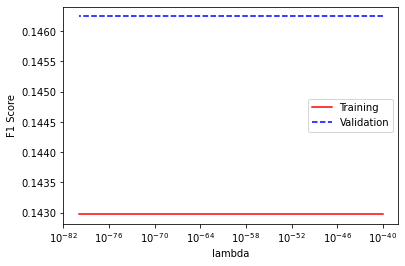

In [137]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('lambda')
plt.legend(['Training','Validation'])
plt.show()

In [130]:
C_val = 0.1584893192

In [131]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, C = C_val, solver='saga', 
                         max_iter=1500, 
                         class_weight='balanced').fit(concat_train_X, train_y.ravel())
train_pred = clf.predict(concat_train_X)
val_pred = clf.predict(concat_val_X)
    
train_f1 = f1_score(train_y, train_pred, average='macro')
val_f1 = f1_score(val_y, val_pred, average='macro')
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.617
Validation F1-Score score: 0.623


In [ ]:
from sklearn.metrics import classification_report

test_pred = clf.predict(test_concat)
#train_f1 = f1_score(train_y, test_pred, average='macro')  
print(test_concat.shape)

print(concat_train_X.shape)


In [ ]:
print(test_pred)


export_df = pd.DataFrame(test_pred)

export_df["ID"] = export_df.index + 1
export_df = export_df.rename(columns={0:"LengthOfStay"})

In [ ]:
export_df.columns

In [ ]:
export_df = export_df[["ID", "LengthOfStay"]]

In [ ]:
export_df

In [ ]:
export_df.to_csv(r's3723189_predictions.csv', index = False, header = True)